# Process Data

Running through workflow on this article
https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7

In [1]:
import pandas as pd
import re
import string
from nltk.tokenize import RegexpTokenizer

import seaborn as sns


from gensim.utils import tokenize

import nltk

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk import sent_tokenize, word_tokenize
from textblob import TextBlob

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Work with SAMPLE

In [66]:
# Load Data
df_test_sample = pd.read_pickle('..//data//processed//df_test_sample.pkl')
df_train_sample = pd.read_pickle('..//data//processed//df_train_sample.pkl')
df_comments_sample = pd.read_pickle('..//data//processed//df_comments_sample.pkl')
df_articles_sample = pd.read_pickle('..//data//processed//df_articles_sample.pkl')

In [67]:
df_test_sample.head(1)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,is_popular,uniqueID
1508,OpEd,Opinion,NaN,Op-Ed,"Finally, a Chance for Women to Defeat Trump",How four traumatic years turned Georgia into a...,"['Presidential Election of 2020', 'Women and G...",865,2020-11-03 01:08:08+00:00,1,nyt://article/4edf84b4-374a-5c62-9cdb-f8c838e5...


In [68]:
df_train_sample.head(1)['abstract']

5764    The five-time Olympic gold medalist is taking ...
Name: abstract, dtype: object

In [69]:
df_comments_sample.head(1)

,commentID,status,commentSequence,userID,userDisplayName,userLocation,userTitle,commentBody,createDate,updateDate,...,editorsSelection,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous,articleID
2893132,108107200,approved,108107200,22178100,kdw,"Louisville, KY",NaN,@Jo Williams Exactly I see a nightmarish Gotha...,2020-07-13 15:33:55,2020-07-14 16:47:04,...,False,108103586.0,Jo Williams,2,userReply,0,0,108107200,False,nyt://article/ceee4614-2a34-5964-afa8-e6c1aa2c...


In [70]:
df_test_sample.columns

Index(['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract',
       'keywords', 'word_count', 'pub_date', 'is_popular', 'uniqueID'],
      dtype='object')

# What are the lengths of the abstract columns

## Distribution of Word Count in articles

C:\Users\Mike\.conda\envs\NLP\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

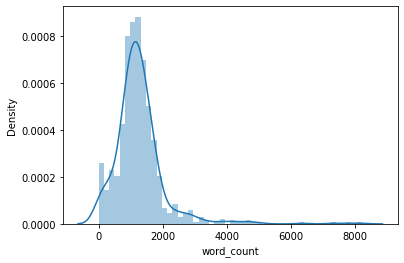

In [137]:
df_test_sample['abstract_len'] = df_test_sample['abstract'].apply(lambda x: len(x))
df_test_sample.reset_index(drop=True,inplace=True)

C:\Users\Mike\.conda\envs\NLP\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abstract_len', ylabel='Density'>

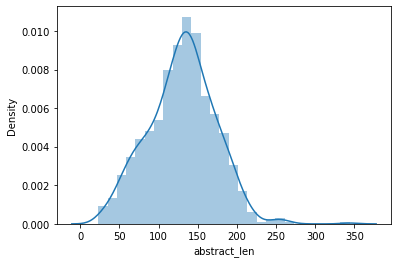

In [138]:
sns.distplot(df_test_sample['abstract_len'])

In [139]:
df_test_sample['abstract'].iloc[6]

'A Canadian’s gruesome account as an Islamic State executioner in Syria, which was the subject of the “Caliphate” podcast by The New York Times, was fabricated, officials say. A Times review found no corroboration of his claim to have committed atrocities.'

In [140]:
df_test_sample['keywords'].iloc[6]

"['internal-essential', 'Chaudhry, Shehroze', 'Islamic State in Iraq and Syria (ISIS)', 'Hoaxes and Pranks', 'Terrorism', 'New York Times', 'Podcasts', 'Caliphate (Radio Program)', 'News and News Media', 'Syria', 'Canada', 'Lahore (Pakistan)', 'Toronto (Ontario)', 'Content Type: Personal Profile']"

In [72]:
sentence = df_test_sample.iloc[6]['abstract']
list(tokenize(sentence))

['A',
 'Canadian',
 's',
 'gruesome',
 'account',
 'as',
 'an',
 'Islamic',
 'State',
 'executioner',
 'in',
 'Syria',
 'which',
 'was',
 'the',
 'subject',
 'of',
 'the',
 'Caliphate',
 'podcast',
 'by',
 'The',
 'New',
 'York',
 'Times',
 'was',
 'fabricated',
 'officials',
 'say',
 'A',
 'Times',
 'review',
 'found',
 'no',
 'corroboration',
 'of',
 'his',
 'claim',
 'to',
 'have',
 'committed',
 'atrocities']

### split into words and handling punctuation

In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
text = df_test_sample['abstract'].str.replace('[^a-zA-Z]',' ')
text


C:\Users\Mike\AppData\Local\Temp/ipykernel_10664/1415527003.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text = df_test_sample['abstract'].str.replace('[^a-zA-Z]',' ')


1508    How four traumatic years turned Georgia into a...
3873    On Jan     the vice president will preside as ...
2875    One day  we ll look back on this year and bawl...
2202    Have you seen more skateboarding parks in your...
305     New York City had been holding off a second wa...
                              ...                        
1859    The  Chanel of streetwear  has a new owner  an...
2432    The ownership of Taylor Swift s catalog return...
992     Teenage comments in response to our recent wri...
1116    Between a third and a half of all eligible vot...
1369    Donald Trump has made America exceptional all ...
Name: abstract, Length: 799, dtype: object

# Normalization
remove the noise

In [7]:
# Normalize
def normalize_col(df, column, column_new):
    #  https://towardsdatascience.com/text-cleaning-methods-
    #  for-natural-language-processing-f2fc1796e8c7
    df[column_new] = df[column].str.lower()
    df[column_new] = df[column].apply\
        (lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|\
        (\w+:\/\/\S+)|^rt|http.+?", "", elem))  

    df[column_new] = df[column].apply\
        (lambda elem: re.sub(r"\d+", "", elem))
    return df

In [8]:
data_clean = normalize_col(df_test_sample, 'abstract', 'abstract_nrml')
data_clean[['abstract','abstract_nrml']]

,abstract,abstract_nrml
1508,How four traumatic years turned Georgia into a...,How four traumatic years turned Georgia into a...
3873,"On Jan. 6, the vice president will preside as ...","On Jan. , the vice president will preside as C..."
2875,"One day, we’ll look back on this year and bawl...","One day, we’ll look back on this year and bawl..."
2202,Have you seen more skateboarding parks in your...,Have you seen more skateboarding parks in your...
305,New York City had been holding off a second wa...,New York City had been holding off a second wa...
...,...,...
1859,"The “Chanel of streetwear” has a new owner, an...","The “Chanel of streetwear” has a new owner, an..."
2432,The ownership of Taylor Swift’s catalog return...,The ownership of Taylor Swift’s catalog return...
992,Teenage comments in response to our recent wri...,Teenage comments in response to our recent wri...
1116,Between a third and a half of all eligible vot...,Between a third and a half of all eligible vot...


# Stopwords

In [13]:
# What are the stopwords
stop[0:5]

['i', 'me', 'my', 'myself', 'we']

In [14]:
def remove_stopwords(df, column, column_new):
    df[column_new] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return df

In [15]:
df_test_sample = remove_stopwords(df_test_sample, 'abstract_nrml','abstract_nrml_stp')

In [16]:
df_test_sample[['abstract','abstract_nrml','abstract_nrml_stp']]

,abstract,abstract_nrml,abstract_nrml_stp
1508,How four traumatic years turned Georgia into a...,How four traumatic years turned Georgia into a...,How four traumatic years turned Georgia swing ...
3873,"On Jan. 6, the vice president will preside as ...","On Jan. , the vice president will preside as C...","On Jan. , vice president preside Congress coun..."
2875,"One day, we’ll look back on this year and bawl...","One day, we’ll look back on this year and bawl...","One day, we’ll look back year bawl. But also r..."
2202,Have you seen more skateboarding parks in your...,Have you seen more skateboarding parks in your...,Have seen skateboarding parks area? Do think s...
305,New York City had been holding off a second wa...,New York City had been holding off a second wa...,"New York City holding second wave, uptick case..."
...,...,...,...
1859,"The “Chanel of streetwear” has a new owner, an...","The “Chanel of streetwear” has a new owner, an...","The “Chanel streetwear” new owner, tough balan..."
2432,The ownership of Taylor Swift’s catalog return...,The ownership of Taylor Swift’s catalog return...,The ownership Taylor Swift’s catalog returned ...
992,Teenage comments in response to our recent wri...,Teenage comments in response to our recent wri...,Teenage comments response recent writing promp...
1116,Between a third and a half of all eligible vot...,Between a third and a half of all eligible vot...,Between third half eligible voters typically s...


# Tokenize

# Lemmatization
Make words in root form, morphological analysis

In [21]:
def wrd_lemmatize(text):
    lemmaed = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lemmaed
    

In [22]:
df_test_sample.columns

Index(['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract',
       'keywords', 'word_count', 'pub_date', 'is_popular', 'uniqueID',
       'abstract_nrml', 'abstract_nrml_stp'],
      dtype='object')

In [23]:
df_test_sample['text_tokens_lemmaed'] = df_test_sample['abstract_nrml_stp'] \
                    .apply(lambda x: wrd_lemmatize(x))

In [24]:
df_test_sample['text_tokens_lemmaed'] 

1508    [H, o, w,  , f, o, u, r,  , t, r, a, u, m, a, ...
3873    [O, n,  , J, a, n, .,  , ,,  , v, i, c, e,  , ...
2875    [O, n, e,  , d, a, y, ,,  , w, e, ’, l, l,  , ...
2202    [H, a, v, e,  , s, e, e, n,  , s, k, a, t, e, ...
305     [N, e, w,  , Y, o, r, k,  , C, i, t, y,  , h, ...
                              ...                        
1859    [T, h, e,  , “, C, h, a, n, e, l,  , s, t, r, ...
2432    [T, h, e,  , o, w, n, e, r, s, h, i, p,  , T, ...
992     [T, e, e, n, a, g, e,  , c, o, m, m, e, n, t, ...
1116    [B, e, t, w, e, e, n,  , t, h, i, r, d,  , h, ...
1369    [D, o, n, a, l, d,  , T, r, u, m, p,  , m, a, ...
Name: text_tokens_lemmaed, Length: 799, dtype: object

## TF-IDF
https://learning.oreilly.com/library/view/natural-language-processing/9781484273517/html/475440_2_En_3_Chapter.xhtml
Term frequency (TF) is the ratio of the count of a particular word present in a sentence to the total count of words in the same sentence. TF captures the importance of the word irrespective of the length of the document. For example, a word with a frequency of 3 in a sentence with 10 words is different from when the word length of the sentence is 100 words. It should have more importance in the first scenario, which is what TF does. TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

Inverse document frequency (IDF) is a log of the ratio of the total number of rows to the number of rows in a particular document in which a word is present. IDF = log(N/n), where N is the total number of rows, and n is the number of rows in which the word was present.

IDF measures the rareness of a term. Words like a and the show up in all the corpus documents, but rare words are not in all documents. So, if a word appears in almost all the documents, that word is of no use since it does not help with classification or information retrieval. IDF nullifies this problem.

TF-IDF is the simple product of TF and IDF that addresses both drawbacks, making predictions and information retrieval relevant.

TF-IDF = TF * IDF

In [158]:
sample = df_test_sample['abstract']

In [160]:
vectorizer = TfidfVectorizer()
vectorizer.fit(sample)
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'how': 2026, 'four': 1714, 'traumatic': 4292, 'years': 4657, 'turned': 4336, 'georgia': 1796, 'into': 2173, 'swing': 4079, 'state': 3938, 'on': 2834, 'jan': 2211, 'the': 4170, 'vice': 4463, 'president': 3162, 'will': 4595, 'preside': 3160, 'as': 309, 'congress': 903, 'counts': 986, 'electoral': 1370, 'college': 827, 'votes': 4495, 'let': 2368, 'hope': 2007, 'that': 4169, 'he': 1932, 'doesn': 1265, 'do': 1257, 'unthinkable': 4396, 'and': 227, 'unconstitutional': 4357, 'one': 2836, 'day': 1076, 'we': 4542, 'll': 2409, 'look': 2427, 'back': 362, 'this': 4193, 'year': 4656, 'bawl': 404, 'but': 613, 'should': 3756, 'also': 202, 'remember': 3434, 'there': 4182, 'were': 4566, 'professionals': 3200, 'out': 2876, 'who': 4580, 'dared': 1069, 'to': 4236, 'bring': 567, 'joy': 2244, 'our': 2874, 'screens': 3650, 'have': 1922, 'you': 4665, 'seen': 3680, 'more': 2648, 'skateboarding': 3793, 'parks': 2940, 'in': 2092, 'your': 4669, 'area': 285, 'think': 4188, 'sport': 3904, 'is': 2198, 'becoming': 41

In [161]:
vectorizer.idf_

array([5.38202663, 6.58599944, 6.58599944, ..., 6.99146455, 6.99146455,
       6.99146455])

In [124]:
vectorizer.idf_[1]

6.585999438999818

In [125]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(df_test_sample['abstract'].iloc[0])
tfidf

ValueError: not enough values to unpack (expected 2, got 1)

# LDA

In [127]:
# LDA
# Importing gensim
import gensim
from gensim import corpora
# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(df_test_sample['abstract'].iloc[6])
# Converting a list of documents (corpus) into Document-Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

TypeError: doc2bow expects an array of unicode tokens on input, not a single string